In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('fhs_train.csv')

if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

print(df.head())
print(df.isnull().sum())

   sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   58        1.0              0         0.0     0.0                0   
1    0   40        1.0              1        15.0     0.0                0   
2    0   52        1.0              0         0.0     0.0                0   
3    1   38        2.0              1        43.0     0.0                0   
4    0   43        1.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    220.0  143.0  104.0  29.85         75     87.0   
1             0         0    199.0  122.0   82.0  22.16         85     77.0   
2             0         0    275.0  112.0   71.0  25.68         80      NaN   
3             1         0    170.0  130.0   94.0  23.90        110     75.0   
4             0         0    202.0  124.0   92.0  21.26         75     74.0   

   TenYearCHD  
0           1  
1           0  
2       

In [3]:
# Fill missing values using median for numerical columns
imputer = SimpleImputer(strategy='median')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filled), columns=df.columns)

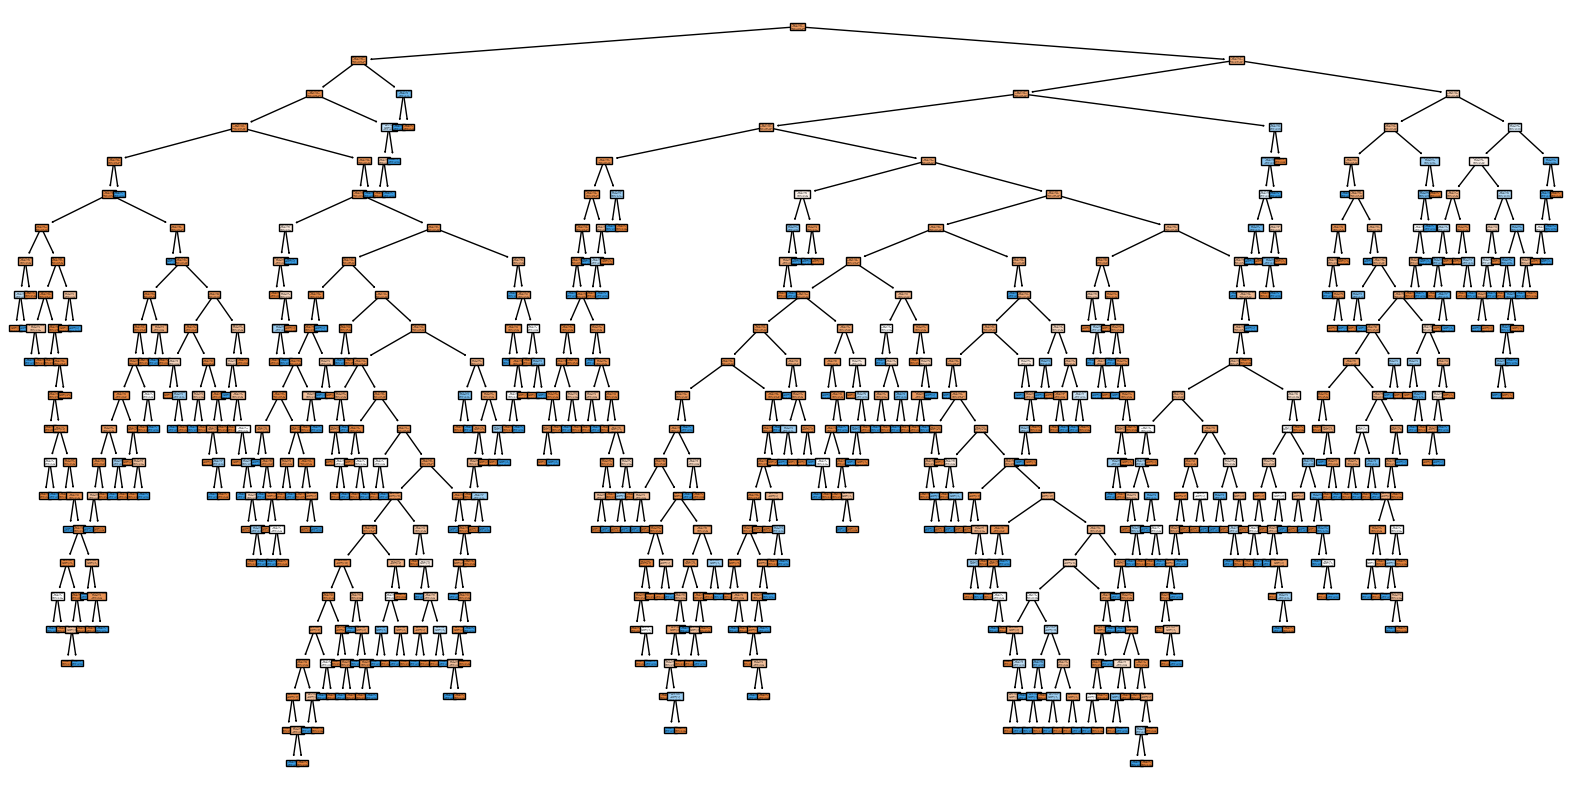

In [4]:
# Split data into features and target variable
X = df_scaled.drop('TenYearCHD', axis=1)
y = df_scaled['TenYearCHD']

# Convert y to binary
y = (y > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=list(X.columns), class_names=['No CHD', 'Yes CHD'])
plt.show()

In [5]:
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}): {X_train.columns[indices[f]]}")

Feature ranking:
1. feature 10 (0.14617604964311967): sysBP
2. feature 14 (0.14233031610101715): glucose
3. feature 12 (0.13658044053277557): BMI
4. feature 9 (0.12151257728050852): totChol
5. feature 1 (0.1177990977390142): age
6. feature 11 (0.09064807622683894): diaBP
7. feature 13 (0.0875009720357782): heartRate
8. feature 2 (0.04254503478653545): education
9. feature 4 (0.030118974150061484): cigsPerDay
10. feature 0 (0.021696886333344375): sex
11. feature 7 (0.02126940449960396): prevalentHyp
12. feature 3 (0.019182657592602674): currentSmoker
13. feature 5 (0.014369776510542193): BPMeds
14. feature 8 (0.0053397967837249165): diabetes
15. feature 6 (0.0029299397845326935): prevalentStroke
